# 住宅価格の回帰
アイオワ州エイムズ市の住宅価格データセット  

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題

# 手法
- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

In [198]:
!pip install -q japanize_matplotlib

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

import seaborn as sns

# データセットの準備
[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


## 練習のための準備
可視化：特徴量は79の中で2つだけを使う  
問題を単純化：GrLivAreaとYearBuiltの2つだけを利用

【問題1】練習のために特徴量の選択
- GrLivAreaとYearBuilt
- SalePrice

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
#@@@ csvファイルの読み込み
# アイオワ州エイムズ市の住宅価格データセット
folder = '/content/drive/MyDrive/Colab Notebooks/D-lab/deta/'
file = 'House_Prices_train.csv'
csv_path = folder + file
np.set_printoptions(suppress=True) # suppress：指数表示→小数表記
df = pd.read_csv(csv_path)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [202]:
# 特徴量 抽出
X = df.filter(['GrLivArea', 'YearBuilt'])
X.head(3),X.shape,type(X)

(   GrLivArea  YearBuilt
 0       1710       2003
 1       1262       1976
 2       1786       2001,
 (1460, 2),
 pandas.core.frame.DataFrame)

In [203]:
# 目標値 抽出
y = df['SalePrice']
y.head(3),y.shape,type(y)

(0    208500
 1    181500
 2    223500
 Name: SalePrice, dtype: int64,
 (1460,),
 pandas.core.series.Series)

## 【問題2】線形回帰による推定と評価

In [204]:
# データ要約表示
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [205]:
# 予約統計量
X.describe()

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


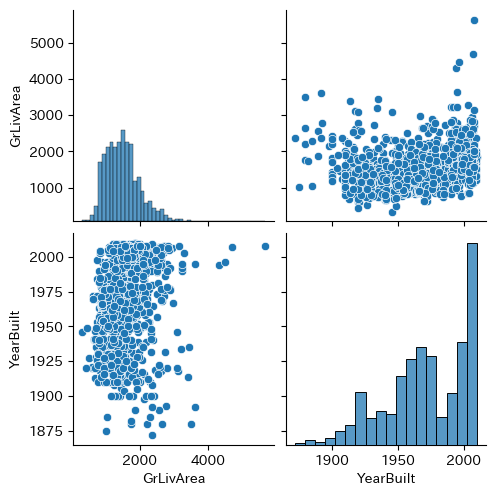

In [206]:
sns.pairplot(X)
plt.show()

In [207]:
# 相関係数 計算
X_corr=X.corr()

<Axes: >

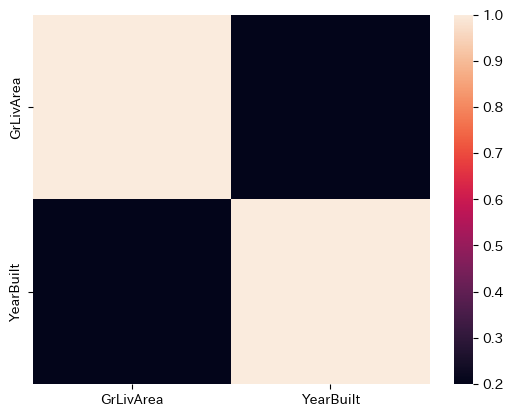

In [208]:
sns.heatmap(X_corr)

In [209]:
# データ分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=123,test_size=0.25)

In [210]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 標準化：目的変数には不要：予測値対象の値が変化してしまう。
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [211]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression
# インスタンス化＋学習
reg = LinearRegression().fit(X_train,y_train)
# 推論
pred_test=reg.predict(X_test)

In [212]:
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test)

1983765930.5988853

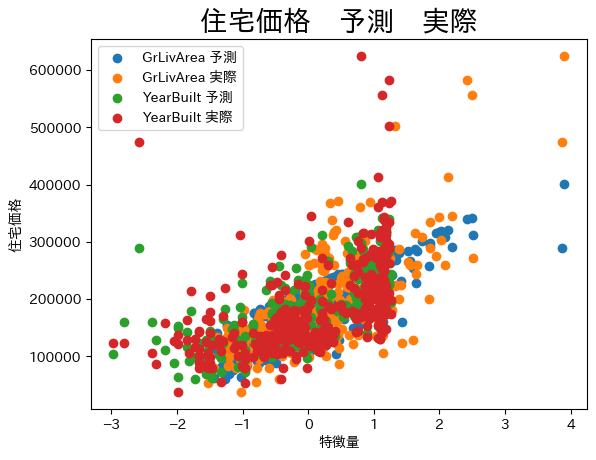

In [213]:
# 可視化
plt.scatter(X_test[:,0], pred_test, label='GrLivArea 予測')
plt.scatter(X_test[:,0], y_test, label='GrLivArea 実際')
plt.scatter(X_test[:,1], pred_test, label='YearBuilt 予測')
plt.scatter(X_test[:,1], y_test, label='YearBuilt 実際')
plt.title("住宅価格　予測　実際",fontsize=20)
plt.xlabel("特徴量")
plt.ylabel("住宅価格")
plt.legend()
plt.show()

## 【問題3】手法の比較

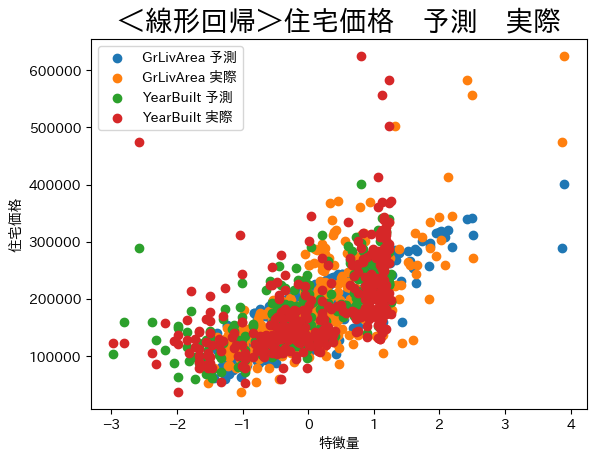

In [214]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression
# インスタンス化＋学習
reg = LinearRegression().fit(X_train,y_train)
# 推論
reg_pred=reg.predict(X_test)

# 平均二乗誤差
from sklearn.metrics import mean_squared_error
reg_mse=mean_squared_error(y_test, reg_pred)

# 可視化
plt.scatter(X_test[:,0], reg_pred, label='GrLivArea 予測')
plt.scatter(X_test[:,0], y_test, label='GrLivArea 実際')
plt.scatter(X_test[:,1], reg_pred, label='YearBuilt 予測')
plt.scatter(X_test[:,1], y_test, label='YearBuilt 実際')
plt.title("＜線形回帰＞住宅価格　予測　実際",fontsize=20)
plt.xlabel("特徴量")
plt.ylabel("住宅価格")
plt.legend()
plt.show()

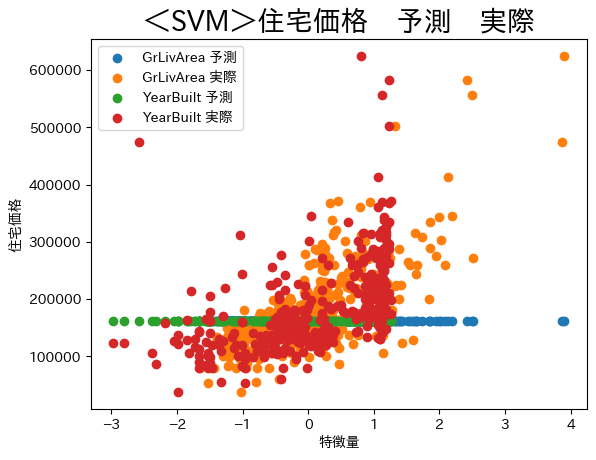

In [215]:
# SVM 回帰用
from sklearn.svm import SVR
# インスタンス化＋学習
svr = SVR().fit(X_train, y_train)
# 推論
svr_predict=svr.predict(X_test)


# 平均二乗誤差
from sklearn.metrics import mean_squared_error
svr_mse = mean_squared_error(y_test, svr_predict)

# 可視化
plt.scatter(X_test[:,0], svr_predict, label='GrLivArea 予測')
plt.scatter(X_test[:,0], y_test, label='GrLivArea 実際')
plt.scatter(X_test[:,1], svr_predict, label='YearBuilt 予測')
plt.scatter(X_test[:,1], y_test, label='YearBuilt 実際')
plt.title("＜SVM＞住宅価格　予測　実際",fontsize=20)
plt.xlabel("特徴量")
plt.ylabel("住宅価格")
plt.legend()
plt.show()

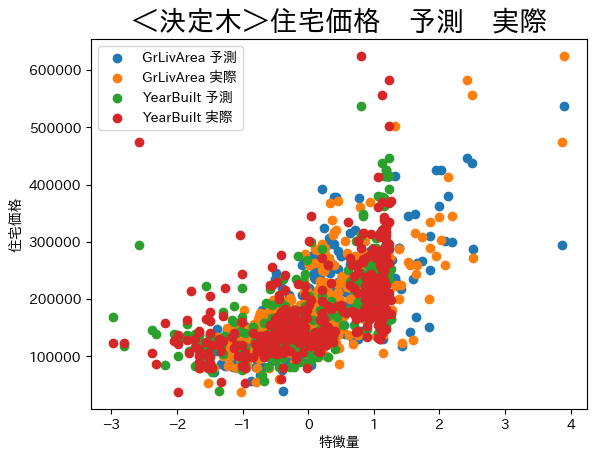

In [216]:
# 決定木　回帰用
from sklearn.tree import DecisionTreeRegressor
# インスタンス化＋学習
dtr = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
# 推論
dtr_predict=dtr.predict(X_test)


# 平均二乗誤差
from sklearn.metrics import mean_squared_error
dtr_mse = mean_squared_error(y_test, dtr_predict)

# 可視化
plt.scatter(X_test[:,0], dtr_predict, label='GrLivArea 予測')
plt.scatter(X_test[:,0], y_test, label='GrLivArea 実際')
plt.scatter(X_test[:,1], dtr_predict, label='YearBuilt 予測')
plt.scatter(X_test[:,1], y_test, label='YearBuilt 実際')
plt.title("＜決定木＞住宅価格　予測　実際",fontsize=20)
plt.xlabel("特徴量")
plt.ylabel("住宅価格")
plt.legend()
plt.show()

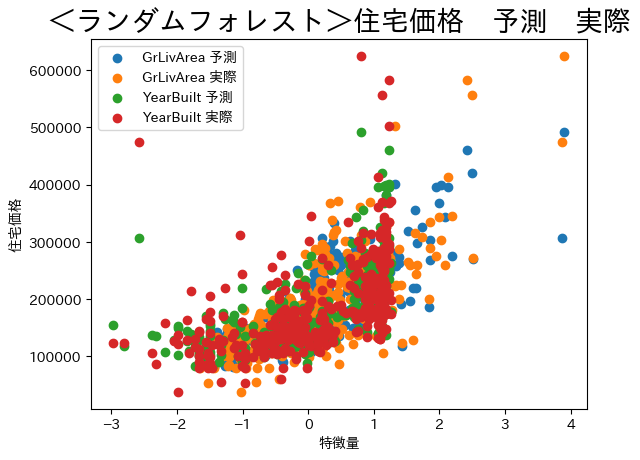

In [217]:
# ランダムフォレスト　回帰用
from sklearn.ensemble import RandomForestRegressor
# インスタンス化＋学習
rfr = RandomForestRegressor(random_state=0).fit(X_train, y_train)
# 推論
rfr_predict=rfr.predict(X_test)


# 平均二乗誤差
from sklearn.metrics import mean_squared_error
rfr_mse = mean_squared_error(y_test, rfr_predict)

# 可視化
plt.scatter(X_test[:,0], rfr_predict, label='GrLivArea 予測')
plt.scatter(X_test[:,0], y_test, label='GrLivArea 実際')
plt.scatter(X_test[:,1], rfr_predict, label='YearBuilt 予測')
plt.scatter(X_test[:,1], y_test, label='YearBuilt 実際')
plt.title("＜ランダムフォレスト＞住宅価格　予測　実際",fontsize=20)
plt.xlabel("特徴量")
plt.ylabel("住宅価格")
plt.legend()
plt.show()

In [218]:
print(f"　　　　　　　　　 | 平均二乗誤差")
print(f"線形回帰　　　　　 | {reg_mse}")
print(f"SVM　　　　　　　 | {svr_mse}")
print(f"決定木　　　　　　 | {dtr_mse}")
print(f"ランダムフォレスト | {rfr_mse}")

　　　　　　　　　 | 平均二乗誤差
線形回帰　　　　　 | 1983765930.5988853
SVM　　　　　　　 | 6467238825.281772
決定木　　　　　　 | 2396611387.3850837
ランダムフォレスト | 1689065702.4928226


一番精度が高い：ランダムフォレスト  
SVMだけ予測値がX軸に沿って一直線になっている

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習

In [219]:
# データ要約表示
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [245]:
df.shape

(1460, 81)

===================================================

In [246]:
# 重複確認
df.duplicated(keep=False).value_counts()

False    1460
dtype: int64

===================================================

In [221]:
# 欠損値　確認
df_null=df.isnull().sum()
df_null=df_null[df_null>0]
pd.DataFrame([df_null,df_null*100/len(df)],index=["欠損数","欠損%"]).T

,欠損数,欠損%
LotFrontage,259.0,17.739726
Alley,1369.0,93.767123
MasVnrType,8.0,0.547945
MasVnrArea,8.0,0.547945
BsmtQual,37.0,2.534247
BsmtCond,37.0,2.534247
BsmtExposure,38.0,2.602740
BsmtFinType1,37.0,2.534247
BsmtFinType2,38.0,2.602740
Electrical,1.0,0.068493


In [222]:
# 列削除　欠損値 16個以上 
df_=df.dropna(thresh=len(df)-15, axis=1)
df_.shape

(1460, 65)

In [223]:
# 欠損値　確認
df_null=df_.isnull().sum()
df_null=df_null[df_null>0]
pd.DataFrame([df_null,df_null*100/len(df_)],index=["数","%"]).T

,数,%
MasVnrType,8.0,0.547945
MasVnrArea,8.0,0.547945
Electrical,1.0,0.068493


In [224]:
# 欠損値補完　(中央値)　MasVnrArea:float型
df_=df_.fillna(df_.mean())
# 欠損値補完　(最頻値)　MasVnrType,Electrical:object型
df_=df_.fillna(df_.mode().iloc[0])

<ipython-input-224-538bed31431f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_=df_.fillna(df_.mean())


In [225]:
# 欠損値　確認
df_null=df_.isnull().sum()
df_null=df_null[df_null>0]
pd.DataFrame([df_null,df_null*100/len(df_)],index=["数","%"]).T

,数,%


===================================================

In [226]:
# カテゴリカル変数　確認
df_obj = df_.select_dtypes(include='object')
df_obj.head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [227]:
# 列のユニーク値の数　確認
df_uni = df_obj.nunique()
df_uni

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [228]:
# 列のユニーク値(2種)　列名　確認
df_2cols = df_uni[df_uni==2].index
df_2cols

Index(['Street', 'Utilities', 'CentralAir'], dtype='object')

In [229]:
# 列のユニーク値(2種)　表記ゆれの確認
df_2=df_.filter(df_2cols)

for uni in df_2.columns:
    print(uni)
    print(df_2[uni].unique())

Street
['Pave' 'Grvl']
Utilities
['AllPub' 'NoSeWa']
CentralAir
['Y' 'N']


In [230]:
# LabelEncoder
# モデルの宣言
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [231]:
# LabelEncoder 適用
for col in df_2cols:
  le = LabelEncoder()
  le.fit(df_[col])
  df_[col] = le.transform(df_[col])

In [232]:
# LabelEncoder 完了確認
df_[df_2cols].head(2)

,Street,Utilities,CentralAir
0,1,0,1
1,1,0,1


ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

In [236]:
# カテゴリカル変数　確認
df_obj = df_.select_dtypes(include='object')

In [237]:
# 列のユニーク値の数　確認
df_uni = df_obj.nunique()
df_uni

MSZoning          5
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
Electrical        5
KitchenQual       4
Functional        7
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [238]:
# 列のユニーク値　列名　確認
df_cols = df_uni.index
df_cols

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [239]:
# 列のユニーク値　表記ゆれの確認
df_a=df_.filter(df_cols)

for uni in df_a.columns:
    print(uni)
    print(df_a[uni].unique())

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco

In [240]:
df_.shape

(1460, 81)

In [243]:
# One-Hot Encoding
df_ = pd.get_dummies(df_, drop_first=True)

In [244]:
df_.shape

(1460, 198)

===================================================

In [247]:
# 特徴量
X = df_.drop("SalePrice",axis=1)
# 目標値
y = df_["SalePrice"]
X.shape,y.shape

((1460, 197), (1460,))

In [248]:
# 予約統計量
X.describe()

,Id,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,0.995890,0.000685,6.099315,5.575342,1971.267808,1984.865753,103.685262,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,9981.264932,0.063996,0.026171,1.382997,1.112799,30.202904,20.645407,180.569112,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,1300.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,7553.500000,1.000000,0.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,9478.500000,1.000000,0.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,11601.500000,1.000000,0.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,215245.000000,1.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [249]:
# 相関係数 計算
X_corr=X.corr()
X_corr

,Id,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.033226,0.008916,0.013324,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,...,-0.058765,-0.020738,-0.018998,0.038920,0.026133,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.139781,-0.024969,-0.022844,0.032628,-0.059316,0.027850,0.040581,0.022895,...,-0.001244,0.014005,-0.045156,-0.014555,0.026359,0.016241,0.030002,0.000983,0.024359,-0.051068
LotArea,-0.033226,-0.139781,1.000000,-0.197131,0.010123,0.105806,-0.005636,0.014228,0.013788,0.103960,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
Street,0.008916,-0.024969,-0.197131,1.000000,0.001682,0.058823,0.042848,0.021137,0.065465,0.017326,...,0.003766,0.003766,0.019397,0.002915,0.006539,0.003367,-0.112734,0.007571,-0.002140,0.019657
Utilities,0.013324,-0.022844,0.010123,0.001682,1.000000,-0.001881,0.009994,-0.011505,-0.034080,0.063427,...,-0.001535,-0.001535,-0.007905,-0.001188,-0.067078,-0.001372,-0.002383,-0.003085,-0.055982,-0.008011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.013208,0.003367,-0.001372,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,0.008966,-0.112734,-0.002383,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,-0.010781,0.007571,-0.003085,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,0.005711,-0.002140,-0.055982,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [252]:
# データ分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=123,test_size=0.25)

In [254]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 標準化：目的変数には不要：予測値対象の値が変化してしまう。
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [262]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression
# インスタンス化＋学習
reg = LinearRegression().fit(X_train,y_train)
# 推論
reg_pred=reg.predict(X_test)

# 平均二乗誤差
from sklearn.metrics import mean_squared_error
reg_mse=mean_squared_error(y_test, reg_pred)

In [263]:
# SVM 回帰用
from sklearn.svm import SVR
# インスタンス化＋学習
svr = SVR().fit(X_train, y_train)
# 推論
svr_predict=svr.predict(X_test)


# 平均二乗誤差
from sklearn.metrics import mean_squared_error
svr_mse = mean_squared_error(y_test, svr_predict)

In [264]:
# 決定木　回帰用
from sklearn.tree import DecisionTreeRegressor
# インスタンス化＋学習
dtr = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
# 推論
dtr_predict=dtr.predict(X_test)


# 平均二乗誤差
from sklearn.metrics import mean_squared_error
dtr_mse = mean_squared_error(y_test, dtr_predict)

In [265]:
# ランダムフォレスト　回帰用
from sklearn.ensemble import RandomForestRegressor
# インスタンス化＋学習
rfr = RandomForestRegressor(random_state=0).fit(X_train, y_train)
# 推論
rfr_predict=rfr.predict(X_test)


# 平均二乗誤差
from sklearn.metrics import mean_squared_error
rfr_mse = mean_squared_error(y_test, rfr_predict)

In [266]:
print(f"　　　　　　　　　 | 平均二乗誤差")
print(f"線形回帰　　　　　 | {reg_mse}")
print(f"SVM　　　　　　　 | {svr_mse}")
print(f"決定木　　　　　　 | {dtr_mse}")
print(f"ランダムフォレスト | {rfr_mse}")

　　　　　　　　　 | 平均二乗誤差
線形回帰　　　　　 | 1.124293226124197e+22
SVM　　　　　　　 | 6481745898.494141
決定木　　　　　　 | 1646188371.4739726
ランダムフォレスト | 746647300.710717


一番精度が高い：線形回帰  
特徴量をふやしたら、劇的に精度が上がった。